In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
!pip install opencv-python matplotlib


VDA

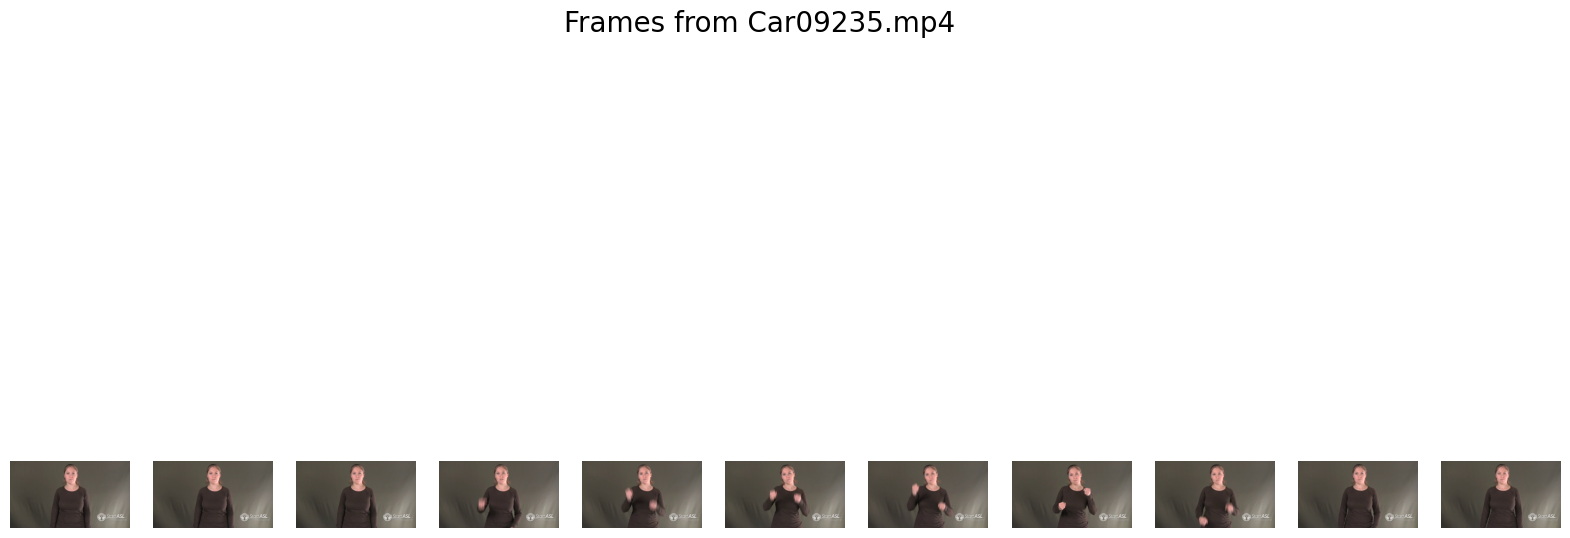

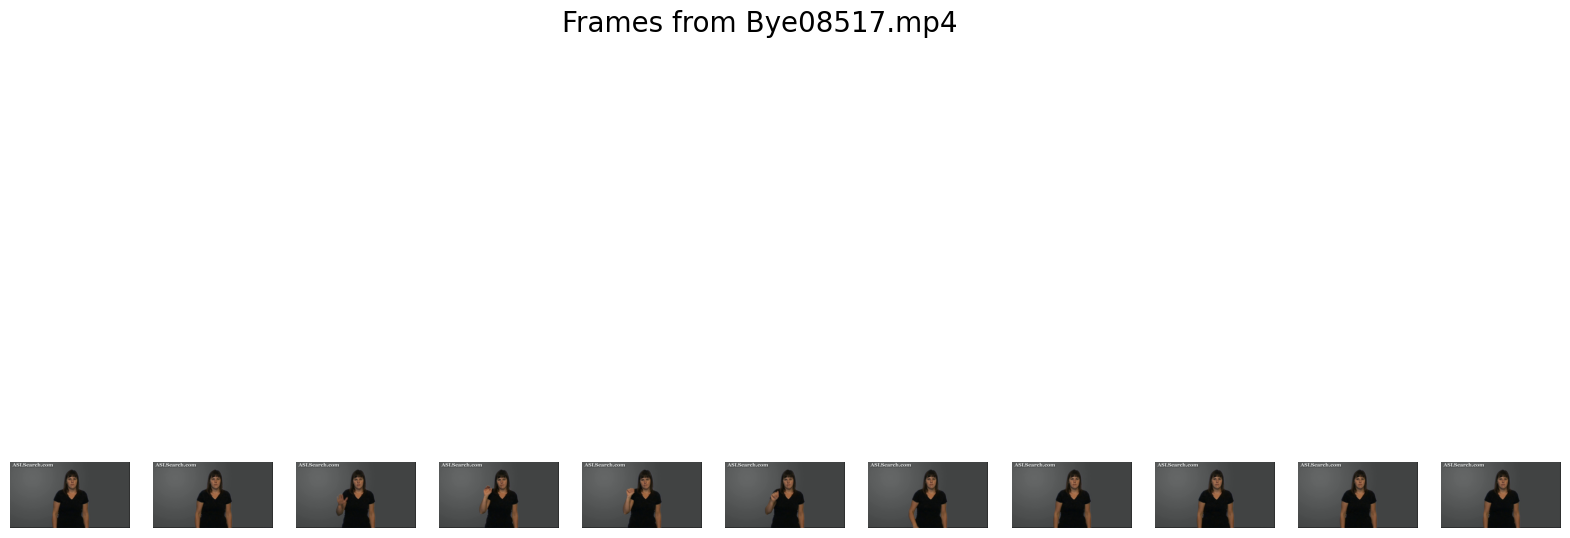

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to read video and extract frames
def extract_frames(video_path, num_frames=10):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = frame_count // num_frames

    for i in range(0, frame_count, step):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        else:
            break

    cap.release()
    return frames

# Directory containing videos
video_dir = '/content/drive/MyDrive/Video13each'

# List all video files in the directory
video_files = [f for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]

# Extract and display frames from each video
for video_file in video_files:
    video_path = os.path.join(video_dir, video_file)
    frames = extract_frames(video_path)

    fig, axes = plt.subplots(1, len(frames), figsize=(20, 10))
    fig.suptitle(f'Frames from {video_file}', fontsize=20)

    for ax, frame in zip(axes, frames):
        ax.imshow(frame)
        ax.axis('off')

    plt.show()


In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
video_dir = '/content/drive/MyDrive/Video13each'
output_frames = '/content/drive/MyDrive/Frames'

In [ ]:
def extract_frames(video_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imwrite(os.path.join(output_folder, f"frame{count:04d}.jpg"), frame)
        count += 1
    cap.release()
    print(f"Extracted {count} frames")

# Example usage
#extract_frames('path_to_your_video.mp4', 'output_frames_folder')

In [ ]:
# Load ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def preprocess_frame(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(folder_path):
    feature_list = []
    frame_files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')])
    for frame_file in frame_files:
        img_array = preprocess_frame(frame_file)
        features = model.predict(img_array)
        feature_list.append(features.flatten())
    return np.array(feature_list)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model.save('resnet50.keras')

In [ ]:
X = []
y = []

for label in os.listdir(video_dir):
    label_dir = os.path.join(video_dir, label)
    # Check if the item in the directory is a folder
    if os.path.isdir(label_dir):
        # Iterate through the videos in the folder
        for video_file in os.listdir(label_dir):
            # Construct the full path to the video file
            video_path = os.path.join(label_dir, video_file)
            extract_frames(video_path,output_frames)
            if len(os.listdir(output_frames)) > 0:
                features = extract_features(output_frames)
                X.append(features)
                y.append(label)

Extracted 73 frames
1/1 [==============================] - 1s 881ms/step
Extracted 55 frames
1/1 [==============================] - 0s 20ms/step
Extracted 92 frames
1/1 [==============================] - 0s 22ms/step
Extracted 60 frames
1/1 [==============================] - 0s 324ms/step
Extracted 100 frames
1/1 [==============================] - 0s 21ms/step
Extracted 57 frames
1/1 [==============================] - 0s 21ms/step
Extracted 40 frames
1/1 [==============================] - 1s 782ms/step
Extracted 87 frames
1/1 [==============================] - 0s 22ms/step
Extracted 115 frames
1/1 [==============================] - 0s 22ms/step
Extracted 85 frames
1/1 [==============================] - 0s 22ms/step


In [ ]:
output_test_frames = '/content/drive/MyDrive/Frames_test'

In [ ]:
X_test = []

for video_file in os.listdir(video_dir):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(video_dir, video_file)
        extract_frames(video_path,output_test_frames)
        if len(os.listdir(output_test_frames)) > 0:
            features = extract_features(output_test_frames)
            X_test.append(features)

Extracted 87 frames
1/1 [==============================] - 0s 33ms/step
Extracted 92 frames
1/1 [==============================] - 0s 20ms/step


In [ ]:
X = [x.get() for x in X]

In [ ]:
X_test = [x.get() for x in X_test]

In [ ]:
max_frames = max(features.shape[0] for features in X)
print(max_frames)

115


In [ ]:
y_test = ['bye', 'car']

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume `features` is a list of feature arrays from videos with unequal lengths
# For example: features = [video1_features, video2_features, ...]

# Find the maximum sequence length
max_sequence_length = max(len(seq) for seq in X)
print(max_sequence_length)
# Pad sequences
X_padded = pad_sequences(X, maxlen=max_sequence_length, padding='post', dtype='float32')

115


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume `features` is a list of feature arrays from videos with unequal lengths
# For example: features = [video1_features, video2_features, ...]

# Find the maximum sequence length
max_sequence_length = max(len(seq) for seq in X)

# Pad sequences
X_test_padded = pad_sequences(X_test, maxlen=max_sequence_length, padding='post', dtype='float32')

In [ ]:
X = np.array(X_padded)

In [ ]:
X_test = np.array(X_test_padded)

In [ ]:
y = np.array(y)

In [ ]:
y_test = np.array(y_test)

In [ ]:
np.save('X_processed2.npy', X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
X_reshaped = np.array(X).reshape(-1, 115, 7, 7, 512)

In [ ]:
X_test_reshaped = np.array(X_test).reshape(-1, 115, 7, 7, 512)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(Masking(mask_value=0.0, input_shape=(max_sequence_length, 2048)))
lstm_model.add(LSTM(256, return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(256, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(2, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_encoded, num_classes=2)
y_test = to_categorical(y_test_encoded, num_classes=2)

In [ ]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 0.8141 - accuracy: 0.5000 - val_loss: 1.4034 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 70ms/step - loss: 0.5414 - accuracy: 0.7500 - val_loss: 1.6394 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 281ms/step - loss: 0.6289 - accuracy: 0.6250 - val_loss: 1.3850 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 69ms/step - loss: 0.5991 - accuracy: 0.6250 - val_loss: 1.0427 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 67ms/step - loss: 0.5404 - accuracy: 0.7500 - val_loss: 0.7716 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 81ms/step - loss: 0.7410 - accuracy: 0.5000 - val_loss: 0.6691 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 69ms/step - loss: 0.5857 - accuracy: 0.7500 - val_loss: 0.6564 - val_accuracy: 1.0000
Epoch 

In [ ]:
# Step 8: Define callbacks
checkpoint = ModelCheckpoint('resnet_video_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
# Step 9: Train the model
history = lstm_model.fit(X_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test), callbacks=[checkpoint])

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.6421 - accuracy: 0.6000
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to resnet_video_model.keras
1/1 [==============================] - 15s 15s/step - loss: 0.6421 - accuracy: 0.6000 - val_loss: 0.7068 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 0.7713 - accuracy: 0.6000
Epoch 2: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 281ms/step - loss: 0.7713 - accuracy: 0.6000 - val_loss: 0.7266 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 0.8751 - accuracy: 0.3000
Epoch 3: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 72ms/step - loss: 0.8751 - accuracy: 0.3000 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: 0.8430 - accuracy: 0.4000
Epoch 4: val_accuracy did not improve from 0.50000


In [ ]:
lstm_model.save('lstm_video_model.keras')

In [ ]:
# Step 5: Evaluate model
y_pred = lstm_model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 419ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Classification Report:\n", report)

Accuracy: 50.00%
Precision: 25.00%
Recall: 50.00%
F1 Score: 33.33%
Classification Report:
               precision    recall  f1-score   support

         bye       0.50      1.00      0.67         1
         car       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_padded, y_train, random_state=42)

In [ ]:
# Use a simpler model for small datasets
simple_lstm_model = Sequential()
simple_lstm_model.add(Masking(mask_value=0.0, input_shape=(115, 2048)))
simple_lstm_model.add(LSTM(64, return_sequences=True))
simple_lstm_model.add(Dropout(0.5))
simple_lstm_model.add(LSTM(64, return_sequences=False))
simple_lstm_model.add(Dropout(0.5))
simple_lstm_model.add(Dense(32, activation='relu'))
simple_lstm_model.add(Dense(2, activation='softmax'))

In [ ]:
simple_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
simple_lstm_model.fit(X_train, y_train, epochs=10, batch_size=4, validation_split=0.25)

Epoch 1/10
2/2 [==============================] - 15s 4s/step - loss: 0.7861 - accuracy: 0.5714 - val_loss: 0.9842 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 0s 51ms/step - loss: 0.7948 - accuracy: 0.5714 - val_loss: 0.8848 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 0s 49ms/step - loss: 0.7513 - accuracy: 0.5714 - val_loss: 0.7524 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 0s 50ms/step - loss: 0.6062 - accuracy: 0.7143 - val_loss: 0.6982 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 0s 50ms/step - loss: 0.6995 - accuracy: 0.4286 - val_loss: 0.6771 - val_accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 0s 50ms/step - loss: 0.6530 - accuracy: 0.4286 - val_loss: 0.6887 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 0s 54ms/step - loss: 0.7717 - accuracy: 0.4286 - val_loss: 0.7041 - val_accuracy: 0.3333
Epoch 8/10
2/2 [============

In [ ]:
# Step 5: Evaluate model
y_pred = simple_lstm_model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Classification Report:\n", report)

1/1 [==============================] - 2s 2s/step
Accuracy: 50.00%
Precision: 25.00%
Recall: 50.00%
F1 Score: 33.33%
Classification Report:
               precision    recall  f1-score   support

         bye       0.00      0.00      0.00         1
         car       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



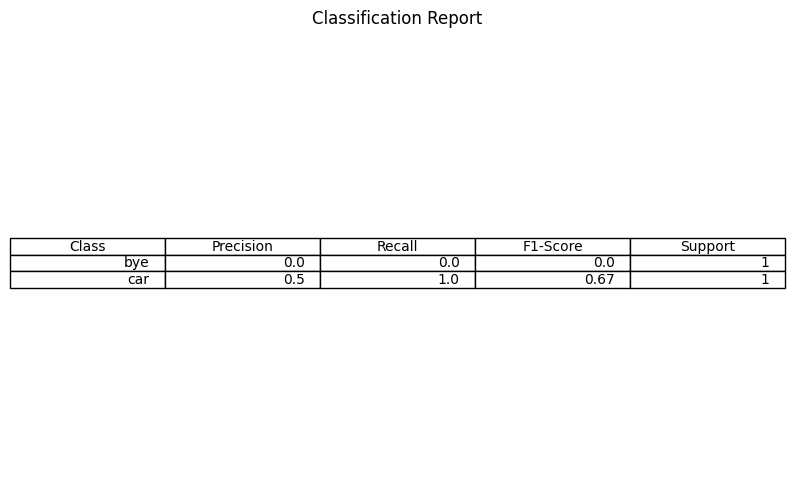

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_classification_table(data, title="Classification Report", filename="classification_report.png"):
    df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, loc='center')

    ax.set_title(title)
    plt.savefig(filename)
    plt.show()

# Example usage
data = {
    'Class': ['bye', 'car'],
    'Precision': [0.00, 0.50],
    'Recall': [0.00, 1.00],
    'F1-Score': [0.00, 0.67],
    'Support': [1, 1]
}

create_classification_table(data)
